# CME193 - Homework 1 Solution

In this assignment, you'll be implementing and exploring properties of [Markov chains](https://en.wikipedia.org/wiki/Markov_chain). Don't worry if you aren't familiar with them -- this notebook will explain everything needed for the assignment.

## Markov chains
Markov chains are simple systems that are described by probabilistic rules at each time step. The best way to introduce Markov chains is with a simple example. Suppose we have a simple counter that can be set to any number between 0 and 5, including 0 and 5. It starts at some number, say 0. At every step, you flip a coin: if it is heads, then the counter increases by 1, and if it is tails, then the counter decreases by 1. The counter doesn't change if the counter is at 0 and we flip tails or if it is at 5 and we flip heads.

Here is an example instance of this Markov chain:
 - Step 0. The counter is at 0.
 - Step 1. The coin lands on tails; the counter remains at 0.
 - Step 2. The coin lands on heads; the counter increases to 1.
 - Step 3. The coin lands on heads; the counter increases to 2.
 - Step 4. The coin lands on tails; the counter decreases to 1.
 - ...and so on.


Mathematically, a Markov chain like this consists of a set of $n$ states (in our example, it is the 6 possible states of the counter), as well as probabilistic rules that indicates the probability of landing in each of the different states after each step. The rule, one for each state, consists of $n$ probabilities that sum to $1$.

For example, if the counter is currently set to 3, the rule would be represented by the vector
$$
\begin{pmatrix} 0 \\ 0 \\ 0.5 \\ 0 \\ 0.5 \\ 0 \end{pmatrix}
$$
This is because after the next step, we have 0 probability of ending up in state 0, 0 probability of state 1, 0.5 probability of state 2, 0 probability of state 3, 0.5 probability of state 4, and so on.

In NumPy, this is:

In [1]:
import numpy as np
np.array([0, 0, 0.5, 0, 0.5, 0])

array([0. , 0. , 0.5, 0. , 0.5, 0. ])

We have one of these probability vectors for each of our states 0 through 5. If we stack these horizontally into a matrix, we end up with what's called the *transition matrix* of the Markov chain. In our case, it looks like this:
$$
T = \begin{pmatrix}
0.5 & 0.5 & 0 & 0 & 0 & 0 \\
0.5 & 0 & 0.5 & 0 & 0 & 0 \\
0 & 0.5 & 0 & 0.5 & 0 & 0 \\
0 & 0 & 0.5 & 0 & 0.5 & 0 \\
0 & 0 & 0 & 0.5 & 0 & 0.5  \\
0 & 0 & 0 & 0 & 0.5 & 0.5 
\end{pmatrix}
$$


In general, we can represent Markov chains with a transition matrix $T$ of size $(n,n)$, where the column $j$ will be the probabilistic rule vector for the state $j$. (Here we are assuming that the states are numbered $0$ to $n-1$. The element $T_{ij}$ represents the probability that we end up in state $i$ if we are currently in state $j$ after a single step.

## Question 1: Transition matrix

For the rest of this assignment, we will consider the following Markov chain. It has $n$ states, numbered $0$ through $n-1$. If the current state is $n-1$, then it stays in the same state of $n-1$ (with probability 1). Otherwise, if current state is $i$, with probability 0.8, it goes to state $i+1$, and with probability 0.2, it falls back to state $i = 0$. Intuitively, at every step there is an 80% chance that it climbs up by 1, but a 20% chance that it falls down all the way. However, if it does reach the state $n-1$, it stays there forever.

Write a function that returns the transition matrix for this Markov chain, given the number of states $n$ as an argument. You are **not** allowed to use any loops for this question; instead, use NumPy indexing to fill in your matrix. You can assume that $n \ge 3$.

In [2]:
# YOUR CODE HERE
def transition_matrix(n):
    tm = np.zeros((n,n))
    tm[0,:n-1] = 0.2
    tm[np.arange(1,n),np.arange(0,n-1)] = 0.8
    tm[n-1,n-1] = 1
    return tm

In [3]:
# TESTING
transition_matrix(10)

array([[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0. ],
       [0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 1. ]])

To test your function, check that the above returns 
```
array([[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0. ],
       [0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 1. ]])
```

## Question 2: Simulation

In this question, we will simulate this Markov chain. That is, we want a sequence of states drawn according to the rules of the Markov chain. Here is one sample of 20 steps drawn from the Markov chain in the previous question, starting from the 0 state.

```[0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9]```

Write a function that returns one such sample for each call. It should take the transition matrix `tm`, number of steps to run for `k`, and a starting state `s0`. It should return a list of `k+1` states, including the starting state. Because each simulation will be random, we expect to get different results every time.

*Hint:* look into using `np.random.choice`.

In [4]:
# YOUR CODE HERE
def sample(tm, k, s0):
    s = s0
    states = [s]
    for i in range(k):
        s = np.random.choice(tm.shape[0], p=tm[:,s])
        states.append(s)
    return states

Use the below code to test out some of the samples. It samples 5 simulations of the Markov chain and plots them. The plot should show that most trajectories have reached the final state after 100 steps.

In [5]:
# TESTING
import matplotlib.pyplot as plt

tm = transition_matrix(10)
for i in range(5):
    states = sample(tm, k=100, s0=0)
    plt.plot(states)
plt.show()

<Figure size 640x480 with 1 Axes>

## Question 3: Average state over time

After each step, the counter increases by 1 or falls back to 0. We want to know how the average state changes over time.

1. Create a transition matrix for $n = 25$.
2. Sample 1000 trajectories of 100 steps using the `sample` function you wrote in Question 2.
3. Compute the average state (over the 1000 samples) for each time step.
4. Plot the average state as a function of the time step.

*Hint:* You should see a plot where the average climbs quickly at first but then slows down.

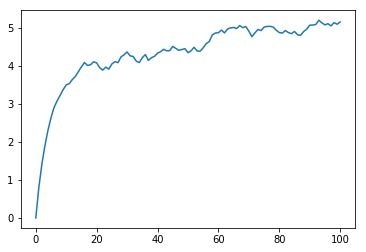

In [6]:
# YOUR CODE HERE
tm = transition_matrix(25)
samples = []
for i in range(1000):
    samples.append(sample(tm, k=100, s0=0))
samples = np.array(samples)

plt.plot(samples.mean(axis=0))
plt.show()

## Question 4: Propagation of probabilities

Suppose we are interested in the probability of being in each state after running the Markov chain for $k$ steps. For example, for the above Markov chain, suppose we want to know: what is the probablity that the state $n-1$ has been reached after 30 steps.

Luckily, this is fairly easy to calculate using matrix multiplication. An amazing property of the transition matrix is as follows. Let $p_j$ be the vector of probabilites at step $j$. That is, the $i$th entry of $p_j$ is the probability that the state is $i$ at step $j$. Then if $T$ is the transition matrix, then $p_{j+1}$ is related to $p_j$ by the following matrix vector product:
$$ p_{j+1} =  Tp_j $$ We will not prove this result here, but it should make sense if you spend some time thinking about what matrix multiplication is doing here, especially interpreting it as taking a linear combination of columns.

Therefore, if someone gives you a starting vector of probabilities $p_0$ describing the initial state distribution, then the probability distribution after $k$ steps is given by multiplying by the transition matrix $k$ times:

$$ p_{k} =  T^{k}p_0 $$
In our example Markov chain, if the state always starts at 0, then $p_0$ is the vector with $1$ in the first entry and $0$ everywhere else, since it starts at the first state with probability $1$.

Write a function which, given a transition matrix `tm`, number of steps `k`, and a vector `p0` describing an initial state distribution, return the distribution after `k` steps of the Markov chain.

In [7]:
# YOUR CODE HERE
def propagate(tm, k, p0):
    p = p0
    for i in range(k):
        p = tm @ p
    return p

# An alternate implementation. This implementation has runtime
# complexity O(n^3 log k), compared to the previous O(n^2 k),
# which may be better in some situations. Note that ** does
# elementwise exponentiation, which is not what we want here.
def propagate_alternate(n):
    return np.linalg.matrix_power(tm, k) @ p

In [8]:
# TESTING
tm = transition_matrix(10)
p0 = np.zeros(10)
p0[0] = 1
pk = propagate(tm, k=30, p0=p0)
pk

array([0.0816156 , 0.06787354, 0.05644353, 0.04694437, 0.03904617,
       0.03247669, 0.02701094, 0.02246264, 0.01867741, 0.6074491 ])

The above code should return :

```
array([0.0816156 , 0.06787354, 0.05644353, 0.04694437, 0.03904617,
       0.03247669, 0.02701094, 0.02246264, 0.01867741, 0.6074491 ])
```

## Question 5: Empirical comparison
Simulate the distribution of states after 100 steps using `sample`, and compare it with the result returned by `propagate`.

1. Create a transition matrix for $n = 25$.
2. Sample 1000 trajectories of 100 steps using `sample`, and record the last state for each trajectory in a separate list.
3. Plot a histogram of final states.
4. Use the function `propagate` that you wrote to compute the theoretical distribution after 100 steps.
5. Plot the theoretical distribution in the same plot and verify that it matches with the histogram.

*Hint:*
1. For the the histogram, you can set the bins manually so that there is one bin for each state. You can do this by setting the `bins` argument in `plt.hist` to be `[-0.5, 0.5, 1.5, 2.5, 3.5, ...]`. This way, the 0 state lands in the first bin, the 1 state lands in the second, etc.

2. The propagate functions returns a probability distribution, so you need to multiply it with the number of samples for it to be comparable to the histogram.

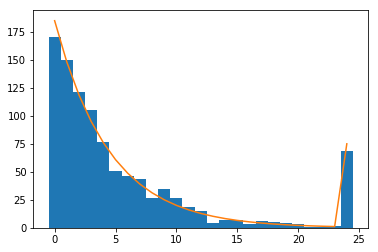

In [9]:
# YOUR CODE HERE
n = 25
n_steps = 100
num_samples = 1000
tm = transition_matrix(25)

states = []
for i in range(num_samples):
    states.append(sample(tm, n_steps, s0=0)[-1])
plt.hist(states, bins=np.arange(n+1)-0.5)

p0 = np.zeros(n)
p0[0] = 1
prob = propagate(tm, n_steps, p0)

plt.plot(prob * num_samples)
plt.show()

## Question 6: Analysis
After each step, the probability of being in the final state slowly increases. At some point, this probability will cross 50%. How many steps does it take for the probability of being in the final state to be at least 0.5? 

Write code that computes the answer, as a function of the number of states `n`.

*Hint:* Use a while loop.

In [10]:
# YOUR CODE HERE
def num_steps(n):
    tm = transition_matrix(n)
    p = np.zeros(n)
    p[0] = 1
    count = 0
    while p[-1] < 0.5:
        p = tm @ p
        count += 1
    return count

# An alternate implementation. This is much slower because 
# it performs many more matrix multiplications in propagate.
def num_steps_alternate(n):
    tm = transition_matrix(n)
    p = np.zeros(n)
    p[0] = 1
    count = 0
    while propagate(tm, count, p)[-1] < 0.5:
        count += 1
    return count

Plot the number of steps required for $n$ ranging from 10 to 40. In addition to plotting with `plt.plot` as normal, also plot using `plt.semilogy` in a separate figure. (What does this function do, and what does the resulting plot tell you?)

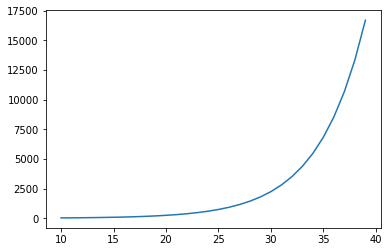

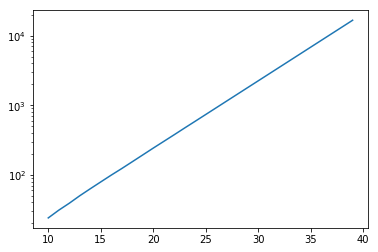

In [11]:
# YOUR CODE HERE
ns = [num_steps(n) for n in range(10, 40)]
plt.plot(range(10, 40), ns)
plt.show()

plt.semilogy(range(10, 40), ns)  # The fact that the plot is a line indicates that the function is exponential
plt.show()

# Submission instructions

Save this notebook (`CME193-Assignment1.ipynb`), and submit it on Canvas.